In [1]:
import feast
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


## Step 1: Load Fact table:
Fact table includes:
- event_timestamp: timestamp of event.
- join_keys: to find relative feature views.
- label columns

In [2]:
data = pd.read_csv('loan_table.csv')
data['event_timestamp'] = pd.to_datetime('today').normalize()
data['is_approved'] = [0 if i%2 else 1 for i in range(data.shape[0])]
data

,dob_ssn,zipcode,event_timestamp,is_approved
0,19530219_5179,1463,2023-07-14,1
1,19781116_7723,80477,2023-07-14,0
2,19931128_5771,19401,2023-07-14,1
3,19500806_6783,31028,2023-07-14,0
4,19620322_7692,65802,2023-07-14,1
...,...,...,...,...
995,19930221_6706,19043,2023-07-14,0
996,19640928_1758,21851,2023-07-14,1
997,19820319_5187,27958,2023-07-14,0
998,19910515_1988,30327,2023-07-14,1


In [3]:
data.dtypes

dob_ssn                    object
zipcode                     int64
event_timestamp    datetime64[ns]
is_approved                 int64
dtype: object

In [4]:
fs = feast.FeatureStore('feast-ibm-test')
feature_service_v1 = fs.get_feature_service('feature_group_v3')

In [5]:
import pyarrow as pa

pa_table = pa.Table.from_pandas(data)

In [6]:
columns = [
    (f.name, f.type) for f in pa_table.schema
]
columns

[('dob_ssn', DataType(string)),
 ('zipcode', DataType(int64)),
 ('event_timestamp', TimestampType(timestamp[ns])),
 ('is_approved', DataType(int64))]

## Step 2: Get historical features:
sss

In [7]:
training_df = fs.get_historical_features(
    entity_df=data,
    features=feature_service_v1
).to_df()
training_df

db2_fs_source -> from_proto:
Db2ServerSource -> field_mapping: {}
Db2ServerSource -> type(field_mapping): <class 'dict'>
db2_fs_source -> from_proto:
Db2ServerSource -> field_mapping: {}
Db2ServerSource -> type(field_mapping): <class 'dict'>


/opt/conda/lib/python3.10/site-packages/feast_ibm_db2-0.0.1-py3.10.egg/feast_ibm_db2/db2_fs_source.py:151: RuntimeWarning: The Azure Synapse + Azure SQL data source is an experimental feature in alpha development. Some functionality may still be unstable so functionality can change in the future.
/opt/conda/lib/python3.10/site-packages/feast_ibm_db2-0.0.1-py3.10.egg/feast_ibm_db2/db2_fs.py:222: RuntimeWarning: The Azure Synapse + Azure SQL offline store is an experimental feature in alpha development. Some functionality may still be unstable so functionality can change in the future.


Check type: string
Check type: int64
Check type: int64
['"dob_ssn" varchar(127)', '"zipcode" bigint', '"event_timestamp" timestamp', '"is_approved" bigint']
['"dob_ssn" string', '"zipcode" int64', '"event_timestamp" timestamp[ns, tz=UTC]', '"is_approved" int64']

/*
 Compute a deterministic hash for the left_table_query_string that will be used throughout
 all the logic as the field to GROUP BY the data
*/
WITH entity_dataframe AS (
    SELECT *,
        event_timestamp AS entity_timestamp
        
            
            ,(
                
                    CAST(dob_ssn as VARCHAR) ||
                
                CAST(event_timestamp AS VARCHAR)
            ) AS credit_history__entity_row_unique_id
            
        
            
            ,(
                
                    CAST(zipcode as VARCHAR) ||
                
                CAST(event_timestamp AS VARCHAR)
            ) AS zipcode_features__entity_row_unique_id
            
        
    FROM feast_entity_df

,dob_ssn,zipcode,event_timestamp,is_approved,credit_card_due,mortgage_due,student_loan_due,vehicle_loan_due,hard_pulls,missed_payments_2y,...,missed_payments_6m,bankruptcies,city,state,location_type,tax_returns_filed,population,total_wages,sum_of_due,new_feature
0,19730605_6441,63939,2023-07-14,1,1083,791170,48033,26152,10,6,...,0,0,FAIRDEALING,MO,PRIMARY,567,1090,13109575,866438,16
1,19730605_6441,63939,2023-07-14,1,1083,791170,48033,26152,10,6,...,0,0,FAIRDEALING,MO,PRIMARY,567,1090,13109575,866438,16
2,19730605_6441,63939,2023-07-14,1,1083,791170,48033,26152,10,6,...,0,0,FAIRDEALING,MO,PRIMARY,567,1090,13109575,866438,16
3,19730605_6441,63939,2023-07-14,1,1083,791170,48033,26152,10,6,...,0,0,FAIRDEALING,MO,PRIMARY,567,1090,13109575,866438,16
4,19530219_5179,1463,2023-07-14,1,8419,91803,22328,15078,0,1,...,0,0,PEPPERELL,MA,PRIMARY,5549,10100,310246738,137628,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,19640928_1758,21851,2023-07-14,1,8112,1904178,388,27059,1,7,...,1,0,POCOMOKE CITY,MD,PRIMARY,3441,5977,105001707,1939737,17
1223,19640928_1758,21851,2023-07-14,1,8112,1904178,388,27059,1,7,...,1,0,POCOMOKE CITY,MD,PRIMARY,3441,5977,105001707,1939737,17
1224,19820319_5187,27958,2023-07-14,0,1215,1099774,14355,11878,2,0,...,0,0,MOYOCK,NC,PRIMARY,4133,8123,177994696,1127222,10
1225,19910515_1988,30327,2023-07-14,1,1399,1342082,20844,18659,3,2,...,1,0,ATLANTA,GA,PRIMARY,16627,24665,1565488324,1382984,12


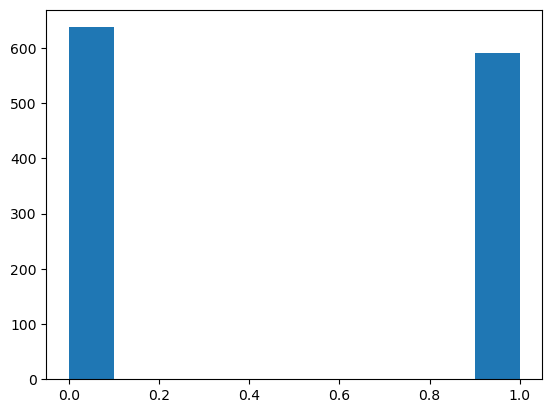

In [8]:
plt.hist(training_df['is_approved'])
plt.show()

In [9]:
from pprint import pprint

pprint(list(training_df.columns))

['dob_ssn',
 'zipcode',
 'event_timestamp',
 'is_approved',
 'credit_card_due',
 'mortgage_due',
 'student_loan_due',
 'vehicle_loan_due',
 'hard_pulls',
 'missed_payments_2y',
 'missed_payments_1y',
 'missed_payments_6m',
 'bankruptcies',
 'city',
 'state',
 'location_type',
 'tax_returns_filed',
 'population',
 'total_wages',
 'sum_of_due',
 'new_feature']


In [10]:
_feature_cols = list(training_df.columns)
_feature_cols.remove('is_approved')
feature_cols = [col for col in _feature_cols if 'timestamp' not in col]
X_train = training_df[feature_cols]
y_train = training_df['is_approved']

In [11]:
print(X_train.shape, y_train.shape)

(1227, 19) (1227,)


In [12]:
# Training simple model in here

## Step 3: Manual materialize to get newest dataset into Online Store:

In [13]:
fs.materialize_incremental(end_date=datetime.now())

db2_fs_source -> from_proto:
Db2ServerSource -> field_mapping: {}
Db2ServerSource -> type(field_mapping): <class 'dict'>
db2_fs_source -> from_proto:
Db2ServerSource -> field_mapping: {}
Db2ServerSource -> type(field_mapping): <class 'dict'>
Materializing 2 feature views to 2023-07-14 05:17:56+00:00 into the sqlite online store.

zipcode_features from 1923-08-08 05:17:56+00:00 to 2023-07-14 05:17:56+00:00:


/opt/conda/lib/python3.10/site-packages/feast_ibm_db2-0.0.1-py3.10.egg/feast_ibm_db2/db2_fs_source.py:151: RuntimeWarning: The Azure Synapse + Azure SQL data source is an experimental feature in alpha development. Some functionality may still be unstable so functionality can change in the future.
/opt/conda/lib/python3.10/site-packages/feast_ibm_db2-0.0.1-py3.10.egg/feast_ibm_db2/db2_fs.py:129: RuntimeWarning: The Azure Synapse + Azure SQL offline store is an experimental feature in alpha development. Some functionality may still be unstable so functionality can change in the future.
100%|█████████████████████████████████████████████████████████| 2729/2729 [00:02<00:00, 1107.79it/s]
/opt/conda/lib/python3.10/site-packages/feast_ibm_db2-0.0.1-py3.10.egg/feast_ibm_db2/db2_fs_source.py:151: RuntimeWarning: The Azure Synapse + Azure SQL data source is an experimental feature in alpha development. Some functionality may still be unstable so functionality can change in the future.
/opt/conda

db2_fs_source -> from_proto:
Db2ServerSource -> field_mapping: {}
Db2ServerSource -> type(field_mapping): <class 'dict'>
credit_history from 1923-08-08 05:18:31+00:00 to 2023-07-14 05:17:56+00:00:


100%|██████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 781.99it/s]

db2_fs_source -> from_proto:
Db2ServerSource -> field_mapping: {}
Db2ServerSource -> type(field_mapping): <class 'dict'>



/opt/conda/lib/python3.10/site-packages/feast_ibm_db2-0.0.1-py3.10.egg/feast_ibm_db2/db2_fs_source.py:151: RuntimeWarning: The Azure Synapse + Azure SQL data source is an experimental feature in alpha development. Some functionality may still be unstable so functionality can change in the future.


## Step 4: Get online features in order to Inference:
sss

In [14]:
online_data = [
    {'zipcode': 63939, 'dob_ssn': '19730605_6441'},
    {'zipcode': 1463, 'dob_ssn': '19530219_5179'},
]
online_data

[{'zipcode': 63939, 'dob_ssn': '19730605_6441'},
 {'zipcode': 1463, 'dob_ssn': '19530219_5179'}]

In [15]:
feature_vector = fs.get_online_features(
    entity_rows=online_data,
    features=feature_service_v1
).to_dict()

db2_fs_source -> from_proto:
Db2ServerSource -> field_mapping: {}
Db2ServerSource -> type(field_mapping): <class 'dict'>
db2_fs_source -> from_proto:
Db2ServerSource -> field_mapping: {}
Db2ServerSource -> type(field_mapping): <class 'dict'>


In [16]:
feature_vector = pd.DataFrame(feature_vector)
feature_vector

,zipcode,dob_ssn,mortgage_due,missed_payments_2y,missed_payments_6m,missed_payments_1y,student_loan_due,bankruptcies,hard_pulls,vehicle_loan_due,credit_card_due,total_wages,population,city,tax_returns_filed,location_type,state,new_feature,sum_of_due
0,63939,19730605_6441,791170,6,0,0,48033,0,10,26152,1083,13109575,1090,FAIRDEALING,567,PRIMARY,MO,16,866438
1,1463,19530219_5179,91803,1,0,0,22328,0,0,15078,8419,310246738,10100,PEPPERELL,5549,PRIMARY,MA,11,137628
